In [1]:
%matplotlib inline

This is testing the Nipype DTI-TK interfaces according to the following tutorial: http://dti-tk.sourceforge.net/pmwiki/pmwiki.php?n=Documentation.Registration

Note: some text excerpts are copied directly from the DTI-TK documentation at the address, above, and have been adapted for the Nipype implementation

DTI-TK developed by Gary Hui Zhang, gary.zhang@ucl.ac.uk
You are running Release 2.3.3. For additional help, visit http://dti-tk.sf.net

In [2]:
import os
from glob import glob
import nipype.interfaces.dtitk as dtitk

/Users/kesshijordan/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
from importlib import reload 
reload(dtitk)

<module 'nipype.interfaces.dtitk' from '/Users/kesshijordan/anaconda/lib/python3.6/site-packages/nipype-1.0.3.dev0+g769a0fc1f-py3.6.egg/nipype/interfaces/dtitk/__init__.py'>

In [4]:
#basepath = '/Users/kesshijordan/ref_data/interscan_dys/test_dtitk_2/sandbox/'
basepath = '../myscripts/'
fixed_tensor = os.path.join(basepath, 'Ptensor.nii.gz')
moving_tensor = os.path.join(basepath, 'Ttensor.nii.gz')
fixed_vol = '../myscripts/Ptensor_tr.nii.gz'
moving_vol = '../myscripts/Ttensor_tr.nii.gz'

# Data:

Scan rescan of single subject on two different scanners with very different sequences 

Ptensor.nii.gz = prisma scanner, susceptibility corrected
Ttensor.nii.gz = trio scanner, not susceptibility corrected

## Get information about each volume 

In [5]:
! VolumeInfo '../myscripts/Ptensor.nii.gz'

NIFTI Intent Code: NIFTI_INTENT_SYMMATRIX
NIFTI Orientation Code: RPI
Volume Info of ../myscripts/Ptensor.nii.gz
size: 65x88x69, voxel size: 2x2x2, origin: [-0, -0, -0]


In [6]:
! VolumeInfo '../myscripts/Ttensor.nii.gz'

NIFTI Intent Code: NIFTI_INTENT_SYMMATRIX
NIFTI Orientation Code: RPI
Volume Info of ../myscripts/Ttensor.nii.gz
size: 62x80x60, voxel size: 2.2x2.2x2.2, origin: [-0, -0, -0]


# Preprocessing: 

(not sure why there's redundant functionality in TVAdjustVoxelspace and TVResample)

KMJ Note: 
- The tutorial recommends moving all volumes to origin [0,0,0] before processing. 
- If you want to do a diffeomorphic registration, make sure you resample such that the dimension 0 is a power of 2

## Adjust Voxel Space

- Output: New volume that has a new voxel size and/or origin (not: if output not specified, then the input volume is modified)
- Usage: TVAdjustVoxelspace -in tensor.nii.gz -out output.nii.gz -target target_tensor.nii.gz -vsize x y z -origin x y z

So you need to provide as input

- target: the filename of the template tensor you want matched in origin and voxel size

OR

- voxel size (vsize): the x y z sizes
    - DEFAULT not automatically passed
- origin: the x y z coordinates of the intended origin
    - DEFAULT {x,y,z} = {0,0,0}

NOTE: if you provide both a target tensor file and specify vsize and/or origin, then the tensor file space will be used

If you want to specify an output file, then you can override the default, which adds "_avs" to the end of the input file

### Tensor Volume

Usage of TVAdjustVoxelspace : 

 - -in            type: string(s)    required: Y	
 - -out           type: string(s)    required: N	by default use the input file name
 - -target        type: string(s)    required: N	output volume origin read from the target volume if specified
 - -vsize         type: double(s)    required: N	
 - -origin        type: double(s)    required: N	

In [7]:
tv_avs_f = dtitk.utils.TVAdjustVoxSp()
tv_avs_f.inputs.in_file = fixed_tensor
tv_avs_f.inputs.origin = (0,0,0)
tv_avs_f.run()

180413-12:10:23,991 interface INFO:
	 stdout 2018-04-13T12:10:23.990650:Reading ../myscripts/Ptensor.nii.gz ... Done in 0.042313s
180413-12:10:23,994 interface INFO:
	 stderr 2018-04-13T12:10:23.994910:WARNING: qform not defined
180413-12:10:23,998 interface INFO:
	 stderr 2018-04-13T12:10:23.994910:WARNING: assumed as RPI
180413-12:10:24,75 interface INFO:
	 stdout 2018-04-13T12:10:24.075256:input voxelspace : size: 65x88x69, voxel size: 2x2x2, origin: [-0, -0, -0]
180413-12:10:24,76 interface INFO:
	 stdout 2018-04-13T12:10:24.075256:output voxelspace : size: 65x88x69, voxel size: 2x2x2, origin: [0, 0, 0]
180413-12:10:24,426 interface INFO:
	 stdout 2018-04-13T12:10:24.426817:Writing Ptensor_avs.nii.gz ... Done in 0.25438s


In [8]:
tv_avs_m = dtitk.utils.TVAdjustVoxSp()
tv_avs_m.inputs.in_file = moving_tensor
tv_avs_m.inputs.origin = (0,0,0)
tv_avs_m.run()

print(tv_avs_m.cmdline)

180413-12:10:24,591 interface INFO:
	 stdout 2018-04-13T12:10:24.590899:Reading ../myscripts/Ttensor.nii.gz ... Done in 0.028526s
180413-12:10:24,594 interface INFO:
	 stderr 2018-04-13T12:10:24.594087:WARNING: qform not defined
180413-12:10:24,595 interface INFO:
	 stderr 2018-04-13T12:10:24.594087:WARNING: assumed as RPI
180413-12:10:24,651 interface INFO:
	 stdout 2018-04-13T12:10:24.651539:input voxelspace : size: 62x80x60, voxel size: 2.2x2.2x2.2, origin: [-0, -0, -0]
180413-12:10:24,654 interface INFO:
	 stdout 2018-04-13T12:10:24.651539:output voxelspace : size: 62x80x60, voxel size: 2.2x2.2x2.2, origin: [0, 0, 0]
180413-12:10:24,879 interface INFO:
	 stdout 2018-04-13T12:10:24.879512:Writing Ttensor_avs.nii.gz ... Done in 0.178122s
TVAdjustVoxelspace -in ../myscripts/Ttensor.nii.gz -origin 0 0 0 -out Ttensor_avs.nii.gz


### Scalar Volume

Usage of SVAdjustVoxelspace : 

 - -in            type: string(s)    required: Y	
 - -out           type: string(s)    required: N	by default use the input file name
 - -target        type: string(s)    required: N	output volume origin read from the target volume if specified
 - -vsize         type: double(s)    required: N	
 - -origin        type: double(s)    required: N	

In [9]:
sv_avs_f = dtitk.utils.SVAdjustVoxSp()
sv_avs_f.inputs.in_file = fixed_vol
sv_avs_f.inputs.target_file = moving_vol
sv_avs_f.run()

print(sv_avs_f.cmdline)

180413-12:10:25,642 interface INFO:
	 stdout 2018-04-13T12:10:25.642297:Reading ../myscripts/Ptensor_tr.nii.gz ... Done in 0.008906s
180413-12:10:25,651 interface INFO:
	 stdout 2018-04-13T12:10:25.651038:input voxelspace : size: 65x88x69, voxel size: 2x2x2, origin: [-0, -0, -0]
180413-12:10:25,653 interface INFO:
	 stdout 2018-04-13T12:10:25.651038:reading output volume origin from ../myscripts/Ttensor_tr.nii.gz
180413-12:10:25,655 interface INFO:
	 stdout 2018-04-13T12:10:25.655734:output voxelspace : size: 65x88x69, voxel size: 2.2x2.2x2.2, origin: [-0, -0, -0]
180413-12:10:25,723 interface INFO:
	 stdout 2018-04-13T12:10:25.722970:Writing Ptensor_tr_avs.nii.gz ... Done in 0.051849s
SVAdjustVoxelspace -in ../myscripts/Ptensor_tr.nii.gz -out Ptensor_tr_avs.nii.gz -target ../myscripts/Ttensor_tr.nii.gz


In [10]:
sv_avs_m = dtitk.utils.SVAdjustVoxSp()
sv_avs_m.inputs.in_file = moving_vol
sv_avs_m.inputs.target_file = fixed_vol
sv_avs_m.run()

print(sv_avs_m.cmdline)

180413-12:10:26,64 interface INFO:
	 stdout 2018-04-13T12:10:26.064313:Reading ../myscripts/Ttensor_tr.nii.gz ... Done in 0.007365s
180413-12:10:26,74 interface INFO:
	 stdout 2018-04-13T12:10:26.074001:input voxelspace : size: 62x80x60, voxel size: 2.2x2.2x2.2, origin: [-0, -0, -0]
180413-12:10:26,75 interface INFO:
	 stdout 2018-04-13T12:10:26.074001:reading output volume origin from ../myscripts/Ptensor_tr.nii.gz
180413-12:10:26,77 interface INFO:
	 stdout 2018-04-13T12:10:26.077237:output voxelspace : size: 62x80x60, voxel size: 2x2x2, origin: [-0, -0, -0]
180413-12:10:26,115 interface INFO:
	 stdout 2018-04-13T12:10:26.115465:Writing Ttensor_tr_avs.nii.gz ... Done in 0.034964s
SVAdjustVoxelspace -in ../myscripts/Ttensor_tr.nii.gz -out Ttensor_tr_avs.nii.gz -target ../myscripts/Ptensor_tr.nii.gz


## Resample 

- Output: New volume that has a new voxel size and/or origin (not: if output not specified, then the input volume is modified)
- Usage: TVAdjustVoxelspace -in tensor.nii.gz -out output.nii.gz -target target_tensor.nii.gz -vsize x y z -origin x y z

So you need to provide as input

- target: the filename of the template tensor you want matched

OR the specific parameters you want to change

- array size (size): the dimensions of the image
- voxel size (vsize): the x y z sizes
    - DEFAULT not automatically passed
- origin: the x y z coordinates of the intended origin
    - DEFAULT {x,y,z} = (0,0,0)

NOTE: if you provide both a target tensor file and specify vsize and/or origin, then the tensor file space will be used

In [11]:
tv_resample_f = dtitk.utils.TVResample()
tv_resample_f.inputs.in_file = fixed_tensor
tv_resample_f.inputs.origin = (0,0,0)
tv_resample_f.inputs.array_size= (128,128,64)
tv_resample_f.run()

print(tv_resample_f.cmdline)

180413-12:10:26,749 interface INFO:
	 stdout 2018-04-13T12:10:26.748948:interpolation option is LEI
180413-12:10:26,790 interface INFO:
	 stdout 2018-04-13T12:10:26.790313:Reading ../myscripts/Ptensor.nii.gz ... Done in 0.040259s
180413-12:10:26,792 interface INFO:
	 stderr 2018-04-13T12:10:26.792495:WARNING: qform not defined
180413-12:10:26,794 interface INFO:
	 stderr 2018-04-13T12:10:26.792495:WARNING: assumed as RPI
180413-12:10:26,873 interface INFO:
	 stdout 2018-04-13T12:10:26.873519:input volume ../myscripts/Ptensor.nii.gz
180413-12:10:26,875 interface INFO:
	 stdout 2018-04-13T12:10:26.873519:size: 65x88x69, voxel size: 2x2x2, origin: [-0, -0, -0]
180413-12:10:26,918 interface INFO:
	 stdout 2018-04-13T12:10:26.918376:output volume specification: size: 128x128x64, voxel size: 2x2x2, origin: [0, 0, 0]
180413-12:10:27,70 interface INFO:
	 stdout 2018-04-13T12:10:27.070792:matching the center of the old and the new voxel spaces
180413-12:10:27,717 interface INFO:
	 stdout 2018-0

In [12]:
tv_resample_m = dtitk.utils.TVResample()
tv_resample_m.inputs.origin = (0,0,0)
tv_resample_m.inputs.array_size= (128,128,64)
tv_resample_m.inputs.in_file=moving_tensor
tv_resample_m.run()

print(tv_resample_m.cmdline)

180413-12:10:27,896 interface INFO:
	 stdout 2018-04-13T12:10:27.895856:interpolation option is LEI
180413-12:10:27,926 interface INFO:
	 stdout 2018-04-13T12:10:27.926839:Reading ../myscripts/Ttensor.nii.gz ... Done in 0.030593s
180413-12:10:27,928 interface INFO:
	 stderr 2018-04-13T12:10:27.928318:WARNING: qform not defined
180413-12:10:27,930 interface INFO:
	 stderr 2018-04-13T12:10:27.928318:WARNING: assumed as RPI
180413-12:10:27,988 interface INFO:
	 stdout 2018-04-13T12:10:27.988329:input volume ../myscripts/Ttensor.nii.gz
180413-12:10:27,991 interface INFO:
	 stdout 2018-04-13T12:10:27.988329:size: 62x80x60, voxel size: 2.2x2.2x2.2, origin: [-0, -0, -0]
180413-12:10:28,32 interface INFO:
	 stdout 2018-04-13T12:10:28.032809:output volume specification: size: 128x128x64, voxel size: 2.2x2.2x2.2, origin: [0, 0, 0]
180413-12:10:28,140 interface INFO:
	 stdout 2018-04-13T12:10:28.140276:matching the center of the old and the new voxel spaces
180413-12:10:28,680 interface INFO:
	 s

In [13]:
sv_resample_f = dtitk.utils.SVResample()
sv_resample_f.inputs.in_file = fixed_vol
sv_resample_f.inputs.origin = (0,0,0)
sv_resample_f.inputs.array_size= (128,128,64)
sv_resample_f.run()

print(sv_resample_f.cmdline)

180413-12:10:28,856 interface INFO:
	 stdout 2018-04-13T12:10:28.856361:Reading ../myscripts/Ptensor_tr.nii.gz ... Done in 0.007675s
180413-12:10:28,862 interface INFO:
	 stdout 2018-04-13T12:10:28.862766:input volume ../myscripts/Ptensor_tr.nii.gz
180413-12:10:28,864 interface INFO:
	 stdout 2018-04-13T12:10:28.862766:size: 65x88x69, voxel size: 2x2x2, origin: [-0, -0, -0]
180413-12:10:28,865 interface INFO:
	 stdout 2018-04-13T12:10:28.865840:output volume specification: size: 128x128x64, voxel size: 2x2x2, origin: [0, 0, 0]
180413-12:10:28,867 interface INFO:
	 stdout 2018-04-13T12:10:28.865840:matching the center of the old and the new voxel spaces
180413-12:10:28,980 interface INFO:
	 stdout 2018-04-13T12:10:28.979983:Writing Ptensor_tr_resampled.nii.gz ... Done in 0.045097s
SVResample -size 128 128 64 -in ../myscripts/Ptensor_tr.nii.gz -origin 0 0 0 -out Ptensor_tr_resampled.nii.gz


In [14]:
sv_resample_m = dtitk.utils.SVResample()
sv_resample_m.inputs.origin = (0,0,0)
sv_resample_m.inputs.array_size= (128,128,64)
sv_resample_m.inputs.in_file = moving_vol
sv_resample_m.run()

print(sv_resample_m.cmdline)

180413-12:10:29,127 interface INFO:
	 stdout 2018-04-13T12:10:29.127560:Reading ../myscripts/Ttensor_tr.nii.gz ... Done in 0.005094s
180413-12:10:29,138 interface INFO:
	 stdout 2018-04-13T12:10:29.136429:input volume ../myscripts/Ttensor_tr.nii.gz
180413-12:10:29,143 interface INFO:
	 stdout 2018-04-13T12:10:29.136429:size: 62x80x60, voxel size: 2.2x2.2x2.2, origin: [-0, -0, -0]
180413-12:10:29,145 interface INFO:
	 stdout 2018-04-13T12:10:29.145686:output volume specification: size: 128x128x64, voxel size: 2.2x2.2x2.2, origin: [0, 0, 0]
180413-12:10:29,147 interface INFO:
	 stdout 2018-04-13T12:10:29.145686:matching the center of the old and the new voxel spaces
180413-12:10:29,262 interface INFO:
	 stdout 2018-04-13T12:10:29.262799:Writing Ttensor_tr_resampled.nii.gz ... Done in 0.050639s
SVResample -size 128 128 64 -in ../myscripts/Ttensor_tr.nii.gz -origin 0 0 0 -out Ttensor_tr_resampled.nii.gz


In [15]:
fixed_tensor_new = os.path.join(basepath,'Ptensor_resampled.nii.gz')
moving_tensor_new = os.path.join('Ttensor_resampled.nii.gz')

## Calculate useful maps

### TVtool (NOTE: I haven't implemented all of them.. selected a few that are tested)

Usage of TVtool : 

 -in            type: string(s)    required: Y	
 -out           type: string(s)    required: N	
 -ad            type: flag         required: N	
 -rd            type: flag         required: N	
 -tr            type: flag         required: N	
 -fa            type: flag         required: N	
 -norm          type: flag         required: N	
 -dnorm         type: flag         required: N	
 -tsp           type: flag         required: N	
 -dtsp          type: flag         required: N	
 -dydisp        type: flag         required: N	
 -dycoh         type: flag         required: N	
 -lps           type: flag         required: N	
 -eigs          type: flag         required: N	
 -pdmp          type: flag         required: N	
 -faThreshold   type: double(s)    required: N	default: 0.2 
 -pd            type: flag         required: N	
 -rgb           type: flag         required: N	
 -luminance     type: double(s)    required: N	default: 1 	Adjusting RGB map luminance
 -faWeighting   type: integer(s)   required: N	default: 1 	Scaling by FA (1) or not (0)
 -spd           type: flag         required: N	
 -reorient      type: flag         required: N	
 -trans         type: string(s)    required: N	
 -euler         type: double(s)    required: N	
 -dev           type: flag         required: N	
 -dyadic        type: flag         required: N	
 -index         type: integer(s)   required: N	default: 0 
 -scale         type: double(s)    required: N	
 -add           type: string(s)    required: N	
 -subtract      type: string(s)    required: N	
 -mosaic        type: string(s)    required: N	
 -piece         type: integer(s)   required: N	default: 16 
 -aop           type: string(s)    required: N	
 -mask          type: string(s)    required: N	
 -alternate     type: double(s)    required: N	
 -nan           type: flag         required: N	
 -print         type: string(s)    required: N	
 -vsm           type: string(s)    required: N	
 -sm            type: string(s)    required: N	
 -SMOption      type: string(s)    required: N	default: EDS 	ED, DDS, EDS or GDS
 -orientation   type: string(s)    required: N	
 -replacement   type: string(s)    required: N	

In [16]:
tvt_f = dtitk.TVtool()
tvt_f.inputs.in_file = fixed_tensor_new
tvt_f.inputs.in_flag = 'tr'

tvt_f_res = tvt_f.run()
print(tvt_f.cmdline)

180413-12:10:29,494 interface INFO:
	 stdout 2018-04-13T12:10:29.493850:Reading ../myscripts/Ptensor_resampled.nii.gz ... Done in 0.06983s
180413-12:10:29,729 interface INFO:
	 stdout 2018-04-13T12:10:29.728963:Computing the tensor trace (mean diffusion) map ... Done in 0.012353s
180413-12:10:29,808 interface INFO:
	 stdout 2018-04-13T12:10:29.808850:Writing Ptensor_resampled_tr.nii.gz ... Done in 0.049992s
TVtool -in ../myscripts/Ptensor_resampled.nii.gz -tr -out Ptensor_resampled_tr.nii.gz


In [17]:
tvt_m = dtitk.TVtool()
tvt_m.inputs.in_file = moving_tensor_new
tvt_m.inputs.in_flag = 'tr'
tvt_m_res = tvt_m.run()
print(tvt_m.cmdline)

180413-12:10:30,48 interface INFO:
	 stdout 2018-04-13T12:10:30.048742:Reading Ttensor_resampled.nii.gz ... Done in 0.069718s
180413-12:10:30,274 interface INFO:
	 stdout 2018-04-13T12:10:30.274225:Computing the tensor trace (mean diffusion) map ... Done in 0.011114s
180413-12:10:30,343 interface INFO:
	 stdout 2018-04-13T12:10:30.342958:Writing Ttensor_resampled_tr.nii.gz ... Done in 0.037505s
TVtool -in Ttensor_resampled.nii.gz -tr -out Ttensor_resampled_tr.nii.gz


In [18]:
fixed_tr_new = 'Ptensor_resampled_tr.nii.gz'
moving_tr_new = 'Ttensor_resampled_tr.nii.gz'

### SVTool not implemented at this time

### Binarize Image (probably for mask to input to diffeo reg)

Usage:

BinaryThresholdImageFilter inputImage outputImage lower upper inside outside

- lower = lower bound threshold
- upper = upper bound threshold
- inside = value for voxels inside lower/upper bounds
- outside = value for voxels outside lower/upper bounds

KMJ NOTE: I'm not sure if you would want a decimal as the thresholds or inside/outside values. May want to change these to integers if that is unlikely

In [19]:
bt_f = dtitk.BinThresh()
bt_f.inputs.in_file = fixed_tr_new
bt_f.inputs.lower_bound = 0.01
bt_f.inputs.upper_bound=100
bt_f.inputs.inside_value=1
bt_f.inputs.outside_value=0
#bt.inputs.out_path = .replace('.nii.gz', '_trbmask.nii.gz')

bt_f.run()

print(bt_f.cmdline)

BinaryThresholdImageFilter Ptensor_resampled_tr.nii.gz Ptensor_resampled_tr_thrbin.nii.gz 0.01 100 1 0


In [20]:
bt_m = dtitk.BinThresh()
bt_m.inputs.in_file = moving_tr_new
bt_m.inputs.lower_bound = 0.01
bt_m.inputs.upper_bound=100
bt_m.inputs.inside_value=1
bt_m.inputs.outside_value=0
bt_m.run()
print(bt_m.cmdline)

BinaryThresholdImageFilter Ttensor_resampled_tr.nii.gz Ttensor_resampled_tr_thrbin.nii.gz 0.01 100 1 0


In [21]:
fixed_mask = 'Ptensor_resampled_tr_thrbin.nii.gz'
moving_mask = 'Ttensor_resampled_tr_thrbin.nii.gz'

# Alignment of DTI Volumes

## Rigid Registration

### dti_rigid_reg

- Output: Rigid alignment of a DTI volume (the subject) to a DTI template
- Usage: dti_rigid_reg template subject SMOption xsep ysep zsep ftol [useInTrans]

So you need to provide as input

- template: the filename of the template
- subject: the filename of the subject
- SMOption: the similarity metric you'd like to use for assessing the quality of alignment 
    - EDS: Euclidean Distance Squared between tensors (DEFAULT)
    - GDS: Geometric Distance Squared between tensors
    - DDS: Deviatoric Distance Squared between deviatoric tensors
    - NMI: Normalized Mutual Information between tensor components
- {x,y,z}sep: the distance between the sample points in the volume for the evaluation of image similarity (mm)
    - DEFAULT {x,y,z} = {2,2,2}
- ftol: the minimum amount of change in the cost function as a fraction of the previous value at the previous iteration for the registration optimization to stop
    - DEFAULT = 0.01
- useInTrans: the optional input to specify whether to initialize with some previously determined transformation.

The output from this command includes the registered image and the transformation that achieves the alignment. If we denote the filename of the subject as \${prefix}.nii.gz, then the filename of the registered image will be \${prefix_aff.nii.gz and that of the transformation will be \${prefix}.aff.

### Test interface

In [22]:
rigid = dtitk.Rigid()
rigid.inputs.fixed_file = fixed_tensor_new
rigid.inputs.moving_file = moving_tensor_new

rigid_res = rigid.run()
print(rigid.cmdline)

180413-12:10:33,832 interface INFO:
	 stdout 2018-04-13T12:10:33.832070:Rigid Registration of Ttensor_resampled.nii.gz to ../myscripts/Ptensor_resampled.nii.gz
180413-12:10:33,837 interface INFO:
	 stdout 2018-04-13T12:10:33.832070:Similarity Measure : EDS
180413-12:10:33,838 interface INFO:
	 stdout 2018-04-13T12:10:33.832070:Reorient Option : FS
180413-12:10:33,910 interface INFO:
	 stdout 2018-04-13T12:10:33.910246:Reading ../myscripts/Ptensor_resampled.nii.gz ... Done in 0.075615s
180413-12:10:34,140 interface INFO:
	 stdout 2018-04-13T12:10:34.140773:sampling step size = [2, 2, 2]
180413-12:10:34,527 interface INFO:
	 stdout 2018-04-13T12:10:34.527897:Gaussian smoothing: sigma = [0.736, 0.736, 0.736] ... Done in 0.375s
180413-12:10:34,581 interface INFO:
	 stdout 2018-04-13T12:10:34.581759:Reading Ttensor_resampled.nii.gz ... Done in 0.0533s
180413-12:10:35,95 interface INFO:
	 stdout 2018-04-13T12:10:35.095350:Gaussian smoothing: sigma = [0.645, 0.645, 0.645] ... Done in 0.322s
1

## Affine Registration

### dti_affine_reg

- Output: Affine alignment of a DTI volume (the subject) to a DTI template
- Usage: dti_affine_reg template subject SMOption xsep ysep zsep ftol [useInTrans]

So you need to provide as input

- template: the filename of the template
- subject: the filename of the subject
- SMOption: the similarity metric you'd like to use for assessing the quality of alignment 
    - EDS: Euclidean Distance Squared between tensors
    - GDS: Geometric Distance Squared between tensors
    - DDS: Deviatoric Distance Squared between deviatoric tensors
    - NMI: Normalized Mutual Information between tensor components
- {x,y,z}sep: the distance between the sample points in the volume for the evaluation of image similarity (mm)
- ftol: the minimum amount of change in the cost function as a fraction of the previous value at the previous iteration for the registration optimization to stop
- useInTrans: the optional input to specify whether to initialize with some previously determined transformation.

The output from this command includes the registered image and the transformation that achieves the alignment. If we denote the filename of the subject as \${prefix}.nii.gz, then the filename of the registered image will be \${prefix_aff.nii.gz and that of the transformation will be \${prefix}.aff.

### Test interface

In [24]:
affine = dtitk.Affine()
affine.inputs.fixed_file = fixed_tensor_new
affine.inputs.moving_file = moving_tensor_new
#this works with a string, or an existing filename
affine.inputs.initialize_xfm = moving_tensor_new.replace('.nii.gz','.aff')

affine_res = affine.run()
print(affine.cmdline)

180413-12:11:24,882 interface INFO:
	 stdout 2018-04-13T12:11:24.881846:Affine Registration of Ttensor_resampled.nii.gz to ../myscripts/Ptensor_resampled.nii.gz
180413-12:11:24,884 interface INFO:
	 stdout 2018-04-13T12:11:24.881846:Similarity Measure : EDS
180413-12:11:24,885 interface INFO:
	 stdout 2018-04-13T12:11:24.881846:Reorient Option : FS
180413-12:11:24,964 interface INFO:
	 stdout 2018-04-13T12:11:24.964838:Reading ../myscripts/Ptensor_resampled.nii.gz ... Done in 0.08038s
180413-12:11:25,175 interface INFO:
	 stdout 2018-04-13T12:11:25.175864:sampling step size = [2, 2, 2]
180413-12:11:25,495 interface INFO:
	 stdout 2018-04-13T12:11:25.495002:Gaussian smoothing: sigma = [0.736, 0.736, 0.736] ... Done in 0.317s
180413-12:11:25,549 interface INFO:
	 stdout 2018-04-13T12:11:25.549554:Reading Ttensor_resampled.nii.gz ... Done in 0.0538s
180413-12:11:26,134 interface INFO:
	 stdout 2018-04-13T12:11:26.134503:Gaussian smoothing: sigma = [0.645, 0.645, 0.645] ... Done in 0.371s


## Apply Affine Transform to Tensor Volume

### affineSymTensor3DVolume

Usage of affineSymTensor3DVolume : 

 - -in            type: string(s)    required: Y	
 - -out           type: string(s)    required: Y	
 - -trans         type: string(s)    required: N	specify an input transformation file; parameters input will be ignored
 - -target        type: string(s)    required: N	output volume specification read from the target volume if specified
 - -interp        type: string(s)    required: N	default: LEI 	EI or LEI
 - -reorient      type: string(s)    required: N	default: PPD 	NO, FS or PPD
 - -translation   type: double(s)    required: N	default: 0 0 0 	x y z in mm
 - -euler         type: double(s)    required: N	default: 0 0 0 	theta phi psi in degrees
 - -deformation   type: double(s)    required: N	default: 1 1 1 0 0 0 	xx yy zz xy yz xz


In [44]:
tv_ar = dtitk.registration.AffSymTensor3DVol()
tv_ar.inputs.in_file = moving_tensor_new
tv_ar.inputs.transform = 'Ttensor_resampled.aff'

tv_ar.run()

print(tv_ar.cmdline)

180412-10:29:09,24 interface INFO:
	 stdout 2018-04-12T10:29:09.024154:inFile = Ttensor_resampled.nii.gz
180412-10:29:09,29 interface INFO:
	 stdout 2018-04-12T10:29:09.024154:outFile = Ttensor_resampled_affxfmd.nii.gz
180412-10:29:09,31 interface INFO:
	 stdout 2018-04-12T10:29:09.024154:interpolation option is LEI
180412-10:29:09,33 interface INFO:
	 stdout 2018-04-12T10:29:09.024154:reorientOption = PPD
180412-10:29:09,92 interface INFO:
	 stdout 2018-04-12T10:29:09.092868:Reading Ttensor_resampled.nii.gz ... Done in 0.068849s
180412-10:29:09,297 interface INFO:
	 stdout 2018-04-12T10:29:09.297213:trans (inverse) applied = [30.425, -9.097, 16.082]
180412-10:29:09,298 interface INFO:
	 stdout 2018-04-12T10:29:09.297213:[ 1.017, -0.139, -0.020;  0.140,  0.992,  0.134; -0.003, -0.146,  1.038]
180412-10:29:09,814 interface INFO:
	 stdout 2018-04-12T10:29:09.814387:backward resampling ...time consumed = 0.340
180412-10:29:10,433 interface INFO:
	 stdout 2018-04-12T10:29:10.433690:Writing

## Apply affine to Scalar Volume

### affineScalarVolume

Usage of affineScalarVolume : 
 - -in            type: string(s)    required: Y	
 - -out           type: string(s)    required: Y	
 - -trans         type: string(s)    required: N	specify an input transformation file; parameters input will be ignored
 - -interp        type: integer(s)   required: N	default: 0 	specify an interpolation scheme, 0 for trilinear (default) and 1 for nearest neighbor
 - -target        type: string(s)    required: N	output volume specification read from the target volume if specified
 - -translation   type: double(s)    required: N	default: 0 0 0 	x y z in mm
 - -euler         type: double(s)    required: N	default: 0 0 0 	theta phi psi in degrees
 - -deformation   type: double(s)    required: N	default: 1 1 1 0 0 0 	xx yy zz xy yz xz


In [45]:
sv_ar = dtitk.registration.AffScalarVol()
sv_ar.inputs.in_file = moving_tr_new
sv_ar.inputs.transform = 'Ttensor_resampled.aff'

sv_ar.run()

print(sv_ar.cmdline)

180412-10:29:10,609 interface INFO:
	 stdout 2018-04-12T10:29:10.609444:inFile = Ttensor_resampled_tr.nii.gz
180412-10:29:10,615 interface INFO:
	 stdout 2018-04-12T10:29:10.609444:outFile = Ttensor_resampled_tr_affxfmd.nii.gz
180412-10:29:10,624 interface INFO:
	 stdout 2018-04-12T10:29:10.624187:Reading Ttensor_resampled_tr.nii.gz ... Done in 0.011843s
180412-10:29:10,659 interface INFO:
	 stdout 2018-04-12T10:29:10.659614:trans (inverse) applied = [30.425, -9.097, 16.082]
180412-10:29:10,661 interface INFO:
	 stdout 2018-04-12T10:29:10.659614:[ 1.017, -0.139, -0.020;  0.140,  0.992,  0.134; -0.003, -0.146,  1.038]
180412-10:29:10,750 interface INFO:
	 stdout 2018-04-12T10:29:10.749952:backward resampling ...time consumed = 0.088
180412-10:29:10,829 interface INFO:
	 stdout 2018-04-12T10:29:10.829246:Writing Ttensor_resampled_tr_affxfmd.nii.gz ... Done in 0.054s
affineScalarVolume -in Ttensor_resampled_tr.nii.gz -interp 0 -out Ttensor_resampled_tr_affxfmd.nii.gz -trans Ttensor_resamp

## Diffeomorphic Registration

### dti_diffeomorphic_reg

Output: Deformable alignment of a DTI volume (the subject) to a DTI template 

Usage: dti_diffeomorphic_reg template subject mask initial no_of_iter ftol

The required input are

- template: the filename of the template
- subject: the filename of the subject
- mask: the filename of a binary image that has 0 for background voxels and 1 for brain tissue voxels
- initial: a legacy parameter, just set to 1
- no_of_iter: number of iterations, recommended value to use is 6
- ftol: the minimum amount of change in the cost function as a fraction of the previous value at the previous iteration for the registration optimization to stop, recommended value is 0.002

The output from this command includes the registered image and the transformation that achieves the alignment. If we denote the filename of the subject as \${prefix}_aff.nii.gz, then the filename of the registered image will be \${prefix}_aff_diffeo.nii.gz and that of the transformation will be \${prefix}_aff_diffeo.df.nii.gz which is stored using the NIfTI vectorial format.

### Note

This is the point at which the dimension of the image matters (must be a power of 2). If you want to use linear registration only, then reslicing is not necessary. However, if you want to do nonlinear registration, then reslicing is required.

reslicing a mask didn't work for me... I had to create one in the new space using DTI-TK's tools (use TVtool to get trace, then put into BinaryThrehsoldImageFilter with params 0.01 100 1 0)

### Test interface

In [ ]:
diffeo = dtitk.Diffeo()
diffeo.inputs.fixed_file = fixed_tensor_new
diffeo.inputs.moving_file = moving_tensor_new.replace('.nii.gz','_aff.nii.gz')
diffeo.inputs.mask_file = 'Ptensor_resampled_tr_thrbin.nii.gz'

diffeo_res = diffeo.run()

print(diffeo.cmdline)

In [ ]:
fixed_tensor_new

## Combine Transforms: Affine and Diffeomorphic 

### dfRightComposeAffine

Usage of dfRightComposeAffine :

 - -df            type: string(s)    required: Y	
 - -aff           type: string(s)    required: Y	
 - -out           type: string(s)    required: Y	

### Test interface

In [ ]:
combo = dtitk.ComposeXfm()
combo.inputs.in_df = 'Ttensor_resampled_aff_diffeo.df.nii.gz'
combo.inputs.in_aff = 'Ttensor_resampled.aff'

combo_res = combo.run()

print(combo.cmdline)

TODO: Fix this interface. Setting the flag to keep the extension doesn't keep the whole thing (just df, not .nii or .nii.gz). This needs to be addressed once PR 2506 is finished

## Apply combined diffeo to tensor

### deformationSymTensor3DVolume

Usage of deformationSymTensor3DVolume : 

 - -in            type: string(s)    required: Y	
 - -out           type: string(s)    required: Y	
 - -trans         type: string(s)    required: Y	
 - -df            type: string(s)    required: N	default: FD 
 - -interp        type: string(s)    required: N	default: LEI 	EI or LEI
 - -reorient      type: string(s)    required: N	default: PPD 	FS or PPD
 - -target        type: string(s)    required: N	output volume specification read from the target volume if specified
 - -vsize         type: double(s)    required: N	
 - -flip          type: integer(s)   required: N	default: 0 0 0 
 - -type          type: integer(s)   required: N	default: 1 	resampling type, 1 for backward (default) and 0 for forward


In [ ]:
tv_applydiff = dtitk.registration.DiffeoSymTensor3DVol()
tv_applydiff.inputs.in_file = moving_tensor_new
tv_applydiff.inputs.transform = 'Ttensor_resampled_aff_diffeo_affdf.df.nii'

tv_applydiff.run()

print(tv_applydiff.cmdline)

## Apply combined diffeo to scalar volume

### deformationScalarVolume
Usage of deformationScalarVolume :

 - -in            type: string(s)    required: Y	
 - -out           type: string(s)    required: Y	
 - -trans         type: string(s)    required: Y	
 - -target        type: string(s)    required: N	output volume specification read from the target volume if specified
 - -vsize         type: double(s)    required: N	
 - -flip          type: integer(s)   required: N	default: 0 0 0 
 - -type          type: integer(s)   required: N	default: 1 	resampling type, 1 for backward (default) and 0 for forward
 - -interp        type: integer(s)   required: N	default: 0 	interpolation type, 0 for trilinear (default) and 1 for nearest neighbor

In [ ]:
sv_applydiff = dtitk.registration.DiffeoScalarVol()
sv_applydiff.inputs.in_file = moving_tr_new
sv_applydiff.inputs.transform = 'Ttensor_resampled_aff_diffeo_affdf.df.nii'

sv_applydiff.run()

print(sv_applydiff.cmdline)

# Test pipeline

In [43]:
if not os.path.exists('working_dir'):
    os.mkdir('working_dir')
if not os.path.exists('datasinker'):
    os.mkdir('datasinker')

In [44]:
from nipype import Node, Workflow
import nipype.interfaces.io as nio
from os.path import abspath
from nipype.interfaces.dipy.anisotropic_power import APMQball

In [45]:
fixed_tensor = abspath(fixed_tensor)
moving_tensor = abspath(moving_tensor)

#fixed_hardi = 
#moving_hardi = 

In [74]:
resample_fixed = Node(dtitk.TVResample(
    in_file = fixed_tensor, origin = (0,0,0), 
    array_size= (128,128,64)), name='resample_fixed')


resample_moving = Node(dtitk.TVResample(in_file=moving_tensor), name='resample_moving')
#resample_moving = Node(dtitk.TVResample(
#    in_file=moving_tensor, origin = (0,0,0), 
#    array_size= (128,128,64)), name='resample_moving')

fa_fixed = Node(dtitk.TVtool(in_flag='fa'), name='fa_fixed')
fa_moving = Node(dtitk.TVtool(in_flag='fa'), name='fa_moving')

mask_node_fixed = Node(dtitk.BinThresh(lower_bound=0.01, 
                                       upper_bound=100,
                                       inside_value=1, 
                                       outside_value=0),
                name='mask_node_fixed')

rigid_node = Node(dtitk.Rigid(), name='rigid_node')

affine_node = Node(dtitk.Affine(), 
                   name='affine_node')

diffeo_node = Node(dtitk.Diffeo(n_iters=6, ftol=0.002),
                   name='diffeo_node')

#diffeo_node = Node(dtitk.Diffeo(n_iters=1, ftol=1),
#                   name='diffeo_node')

compose_xfm_node = Node(dtitk.ComposeXfm(), name='compose_xfm_node')

apply_xfm_node = Node(dtitk.DiffeoScalarVol(), name='apply_xfm_node')

apply_xfm_ten_node = Node(dtitk.DiffeoSymTensor3DVol(), 
                          name='apply_xfm_ten_node')

fa_out = Node(dtitk.TVtool(in_flag='fa'), name='fa_out')
fa_out2 = Node(dtitk.TVtool(in_flag='fa'), name='fa_out2')
fa_out3 = Node(dtitk.TVtool(in_flag='fa'), name='fa_out3')

# Datasink
datasink = Node(nio.DataSink(), name="datasink")
datasink.inputs.base_directory = os.path.abspath('datasinker')
datasink.inputs.container = 'datasink_folder'

# Use the following DataSink output substitutions
#substitutions = [('_subject_id', ''),
#                 ('_session_id_', '')]
#datasink.inputs.substitutions = substitutions

In [75]:
wf = Workflow(name="dtitk_reg", base_dir="working_dir")
#wf.config['execution']={'remove_unnecessary_outputs':False}

In [76]:
wf.config['execution']

OrderedDict([('create_report', 'true'),
             ('crashdump_dir', '/Users/kesshijordan/repos/shared_notebooks'),
             ('hash_method', 'timestamp'),
             ('job_finished_timeout', '5'),
             ('keep_inputs', 'false'),
             ('local_hash_check', 'true'),
             ('matplotlib_backend', 'Agg'),
             ('plugin', 'Linear'),
             ('remove_node_directories', 'false'),
             ('remove_unnecessary_outputs', 'true'),
             ('try_hard_link_datasink', 'true'),
             ('single_thread_matlab', 'true'),
             ('crashfile_format', 'pklz'),
             ('stop_on_first_crash', 'false'),
             ('stop_on_first_rerun', 'false'),
             ('use_relative_paths', 'false'),
             ('stop_on_unknown_version', 'false'),
             ('write_provenance', 'false'),
             ('parameterize_dirs', 'true'),
             ('poll_sleep_duration', '2'),
             ('xvfb_max_wait', '10'),
             ('display_variable

In [77]:
#wf.connect(adjustvs_moving, 'out_file', resample_moving, 'in_file')

wf.connect(resample_fixed, 'out_file', resample_moving, 'target_file')

wf.connect(resample_fixed, 'out_file', mask_node_fixed, 'in_file')

wf.connect(resample_fixed, 'out_file', rigid_node, 'fixed_file')
wf.connect(resample_moving, 'out_file', rigid_node, 'moving_file')

wf.connect(rigid_node, 'out_file_xfm', affine_node, 'initialize_xfm')
#wf.connect(rigid_node, 'out_file', affine_node, 'initialize_xfm')

wf.connect(resample_fixed, 'out_file', affine_node, 'fixed_file')
wf.connect(resample_moving, 'out_file', affine_node, 'moving_file')

wf.connect(resample_fixed, 'out_file', diffeo_node, 'fixed_file')
wf.connect(affine_node, 'out_file', diffeo_node, 'moving_file')
wf.connect(mask_node_fixed, 'out_file', diffeo_node, 'mask_file')

wf.connect(affine_node, 'out_file_xfm', compose_xfm_node, 'in_aff')
wf.connect(diffeo_node, 'out_file_xfm', compose_xfm_node, 'in_df')

wf.connect(resample_fixed, 'out_file', fa_fixed, 'in_file')
wf.connect(resample_moving, 'out_file', fa_moving, 'in_file')

wf.connect(fa_moving, 'out_file', apply_xfm_node, 'in_file')
wf.connect(compose_xfm_node, 'out_file', apply_xfm_node, 'transform')

wf.connect(resample_moving, 'out_file', apply_xfm_ten_node, 'in_file')
wf.connect(compose_xfm_node, 'out_file', apply_xfm_ten_node, 'transform')

wf.connect(apply_xfm_ten_node, 'out_file', fa_out, 'in_file')
wf.connect(diffeo_node, 'out_file', fa_out2, 'in_file')
wf.connect(affine_node, 'out_file', fa_out3, 'in_file')

wf.connect(fa_out3, 'out_file', datasink, 'registration_output.affine_ten_fa')
wf.connect(fa_out2, 'out_file', datasink, 'registration_output.diffeo_ten_fa')
wf.connect(fa_out, 'out_file', datasink, 'registration_output.composed_ten_fa')
wf.connect(fa_fixed, 'out_file', datasink, 'registration_output.fixed_fa')
wf.connect(apply_xfm_node, 'out_file', datasink, 'registration_output.composed_scalar_fa')

180412-12:16:43,512 workflow INFO:
	 Generated workflow graph: working_dir/dtitk_reg/workflow_graph.png (graph2use=hierarchical, simple_form=True).


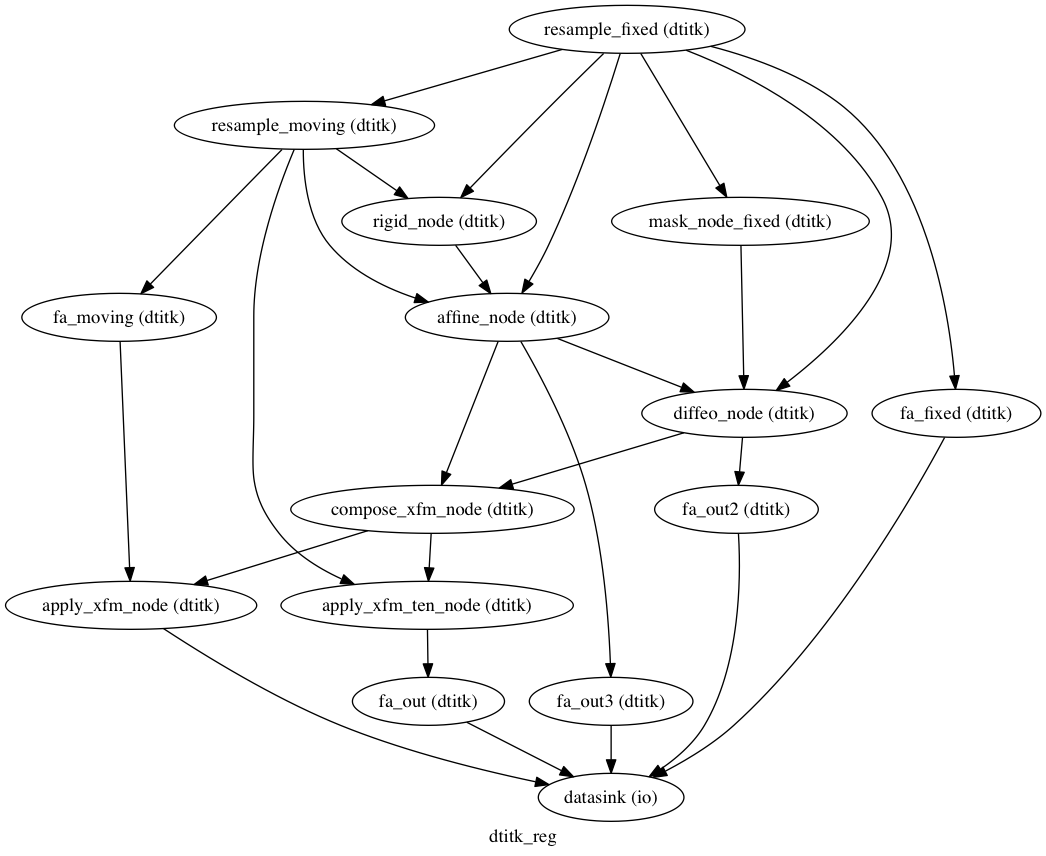

In [78]:
wf.write_graph("workflow_graph.dot")
from IPython.display import Image
Image(filename="working_dir/dtitk_reg/workflow_graph.png")

180412-12:16:44,413 workflow INFO:
	 Generated workflow graph: /Users/kesshijordan/repos/shared_notebooks/working_dir/dtitk_reg/graph.png (graph2use=flat, simple_form=True).


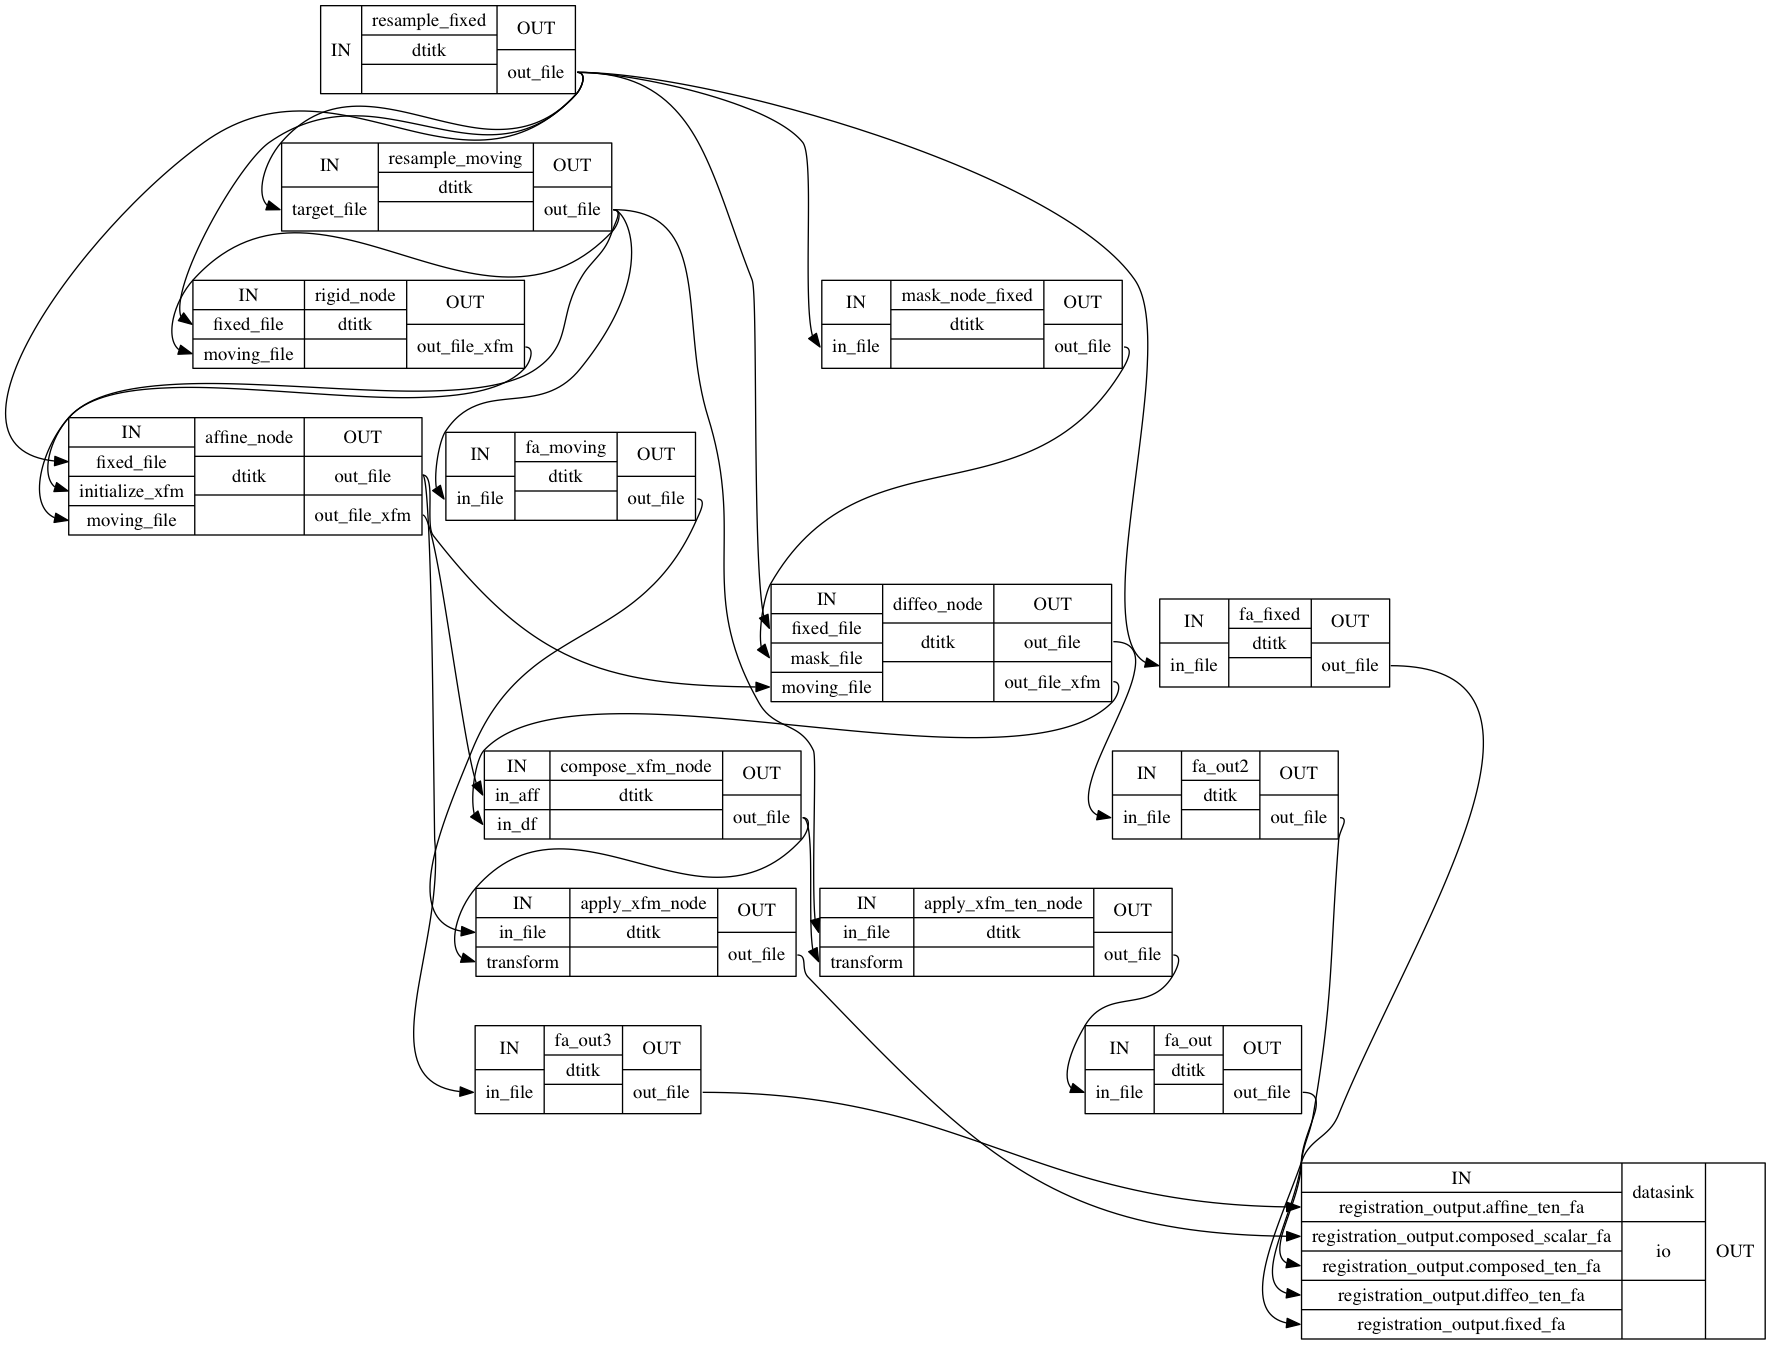

In [79]:
wf.write_graph(graph2use='flat')
from IPython.display import Image
Image(filename="working_dir/dtitk_reg/graph_detailed.png")

In [80]:
wf.run()

180412-12:16:44,744 workflow INFO:
	 Workflow dtitk_reg settings: ['check', 'execution', 'logging', 'monitoring']
180412-12:16:44,769 workflow INFO:
	 Running serially.
180412-12:16:44,771 workflow INFO:
	 [Node] Setting-up "dtitk_reg.resample_fixed" in "/Users/kesshijordan/repos/shared_notebooks/working_dir/dtitk_reg/resample_fixed".
180412-12:16:44,776 workflow INFO:
	 [Node] Cached "dtitk_reg.resample_fixed" - collecting precomputed outputs
180412-12:16:44,777 workflow INFO:
	 [Node] "dtitk_reg.resample_fixed" found cached.
180412-12:16:44,779 workflow INFO:
	 [Node] Setting-up "dtitk_reg.resample_moving" in "/Users/kesshijordan/repos/shared_notebooks/working_dir/dtitk_reg/resample_moving".
180412-12:16:44,789 workflow INFO:
	 [Node] Cached "dtitk_reg.resample_moving" - collecting precomputed outputs
180412-12:16:44,791 workflow INFO:
	 [Node] "dtitk_reg.resample_moving" found cached.
180412-12:16:44,793 workflow INFO:
	 [Node] Setting-up "dtitk_reg.fa_moving" in "/Users/kesshijorda

In [64]:
from dipy.viz import regtools
import nibabel as nib

In [65]:
fafixed = 'datasinker/datasink_folder/test_output/Ptensor_resampled_fa.nii.gz'
faaff = 'datasinker/datasink_folder/test_output/Ttensor_resampled_aff_fa.nii.gz'
fadiffeo_step = 'datasinker/datasink_folder/test_output/Ttensor_resampled_aff_diffeo_fa.nii.gz'
fadiffeo_xfmten = 'datasinker/datasink_folder/test_output/Ttensor_resampled_diffeoxfmd_fa.nii.gz'
fadiffeo_xfmvol = 'datasinker/datasink_folder/test_output/Ttensor_resampled_fa_diffeoxfmd.nii.gz'

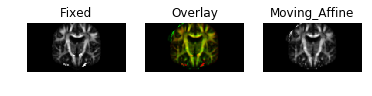

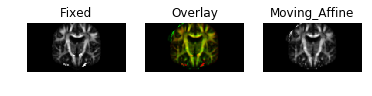

In [67]:
regtools.overlay_slices(nib.load(fafixed).get_data(), 
                        nib.load(faaff).get_data(), 
                        None, 1, 'Fixed', 'Moving_Affine')

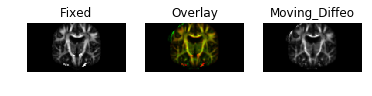

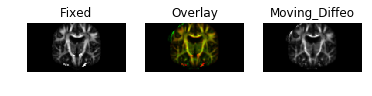

In [68]:
regtools.overlay_slices(nib.load(fafixed).get_data(), 
                        nib.load(fadiffeo_step).get_data(), 
                        None, 1, 'Fixed', 'Moving_Diffeo')

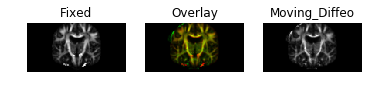

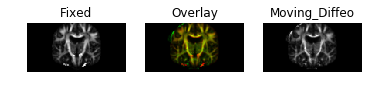

In [69]:
regtools.overlay_slices(nib.load(fafixed).get_data(), 
                        nib.load(fadiffeo_xfmten).get_data(), 
                        None, 1, 'Fixed', 'Moving_Diffeo')

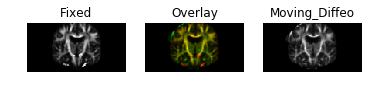

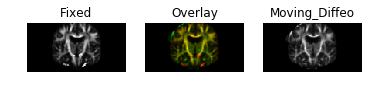

In [70]:
regtools.overlay_slices(nib.load(fafixed).get_data(), 
                        nib.load(fadiffeo_xfmvol).get_data(), 
                        None, 1, 'Fixed', 'Moving_Diffeo')

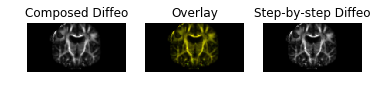

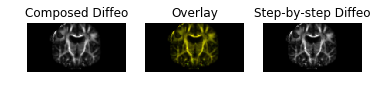

In [71]:
regtools.overlay_slices(nib.load(fadiffeo_step).get_data(), nib.load(fadiffeo_xfmten).get_data(), None, 1, 'Composed Diffeo', 'Step-by-step Diffeo')

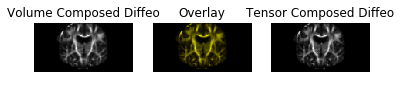

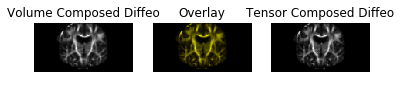

In [72]:
regtools.overlay_slices(nib.load(fadiffeo_xfmvol).get_data(), 
                        nib.load(fadiffeo_xfmten).get_data(), None, 1, 
                        'Volume Composed Diffeo', 'Tensor Composed Diffeo')